<a href="https://colab.research.google.com/github/wanutchapornmun/Statistical-Learning-Labs/blob/main/29351_LAB09_660510561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [71]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-07 12:54:50--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-07 12:54:51 (46.5 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [72]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [73]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


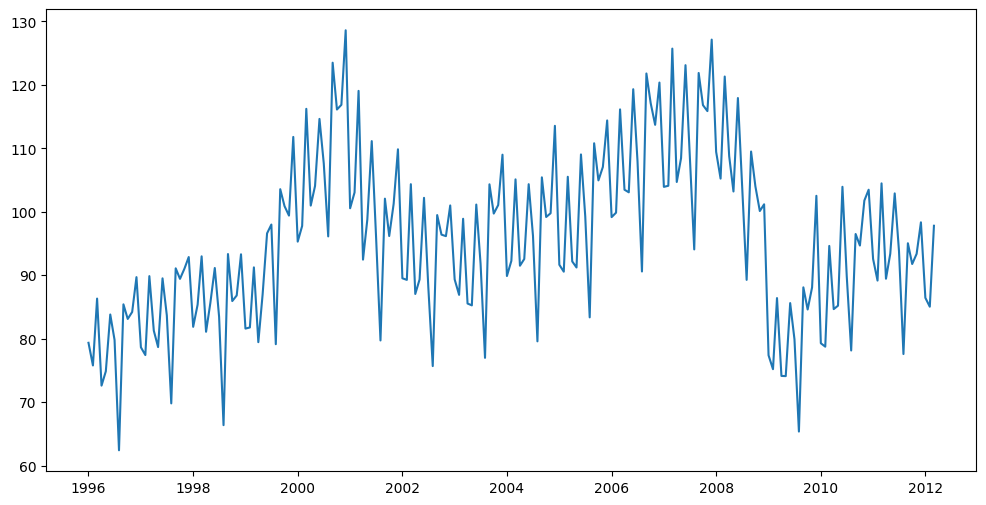

In [74]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [75]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [76]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [77]:
# กรณีที่เดือนเป็นเลขคี่
#data['MA'] = data['value'].rolling(window=5,center=True).mean()

# กรณีที่เดือนเป็นเลขคู่
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,NaN
1996-04-01,4.0,72.60,NaN
1996-05-01,5.0,74.86,NaN
1996-06-01,6.0,83.81,NaN
1996-07-01,7.0,79.80,79.750417
1996-08-01,8.0,62.41,79.789167
1996-09-01,9.0,85.41,80.005000


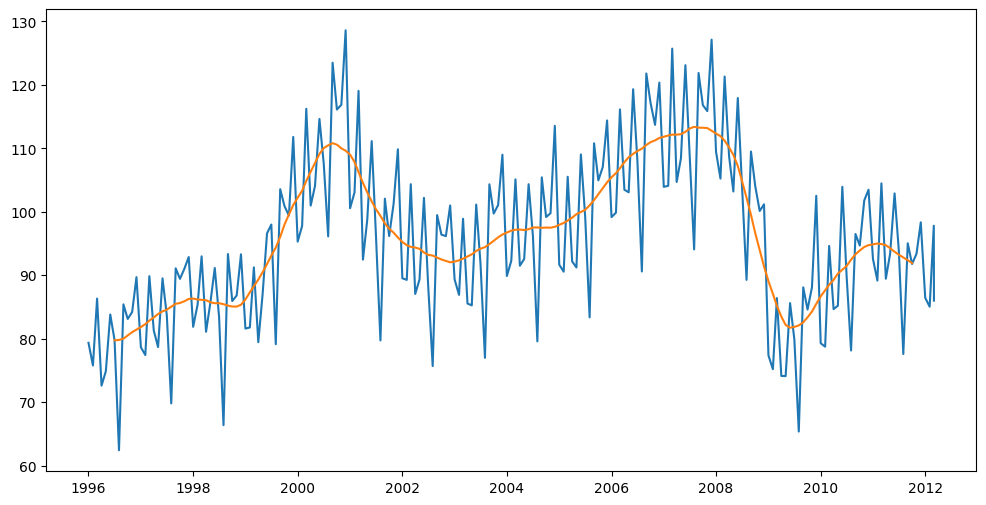

In [78]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

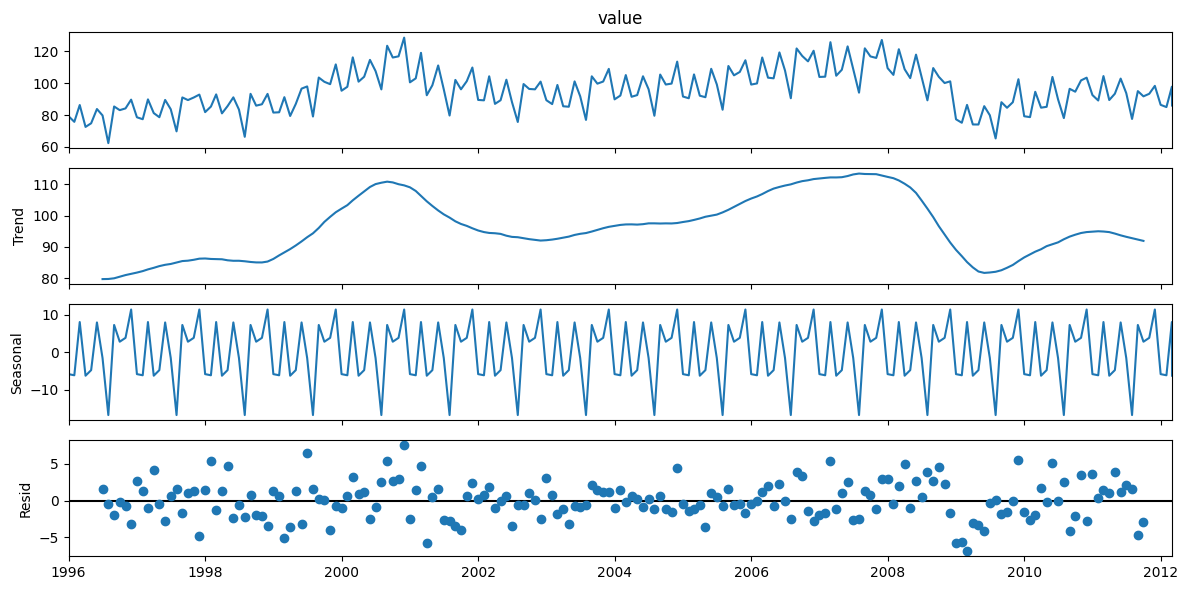

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
# additive = model เป็นแบบ "บวก"
mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period=12) # ใส่ period เพื่อป้องกัน error (ส่วนใหญ่แล้วข้อมูลรายปีจะไม่มี seasonal)

result_add.plot();

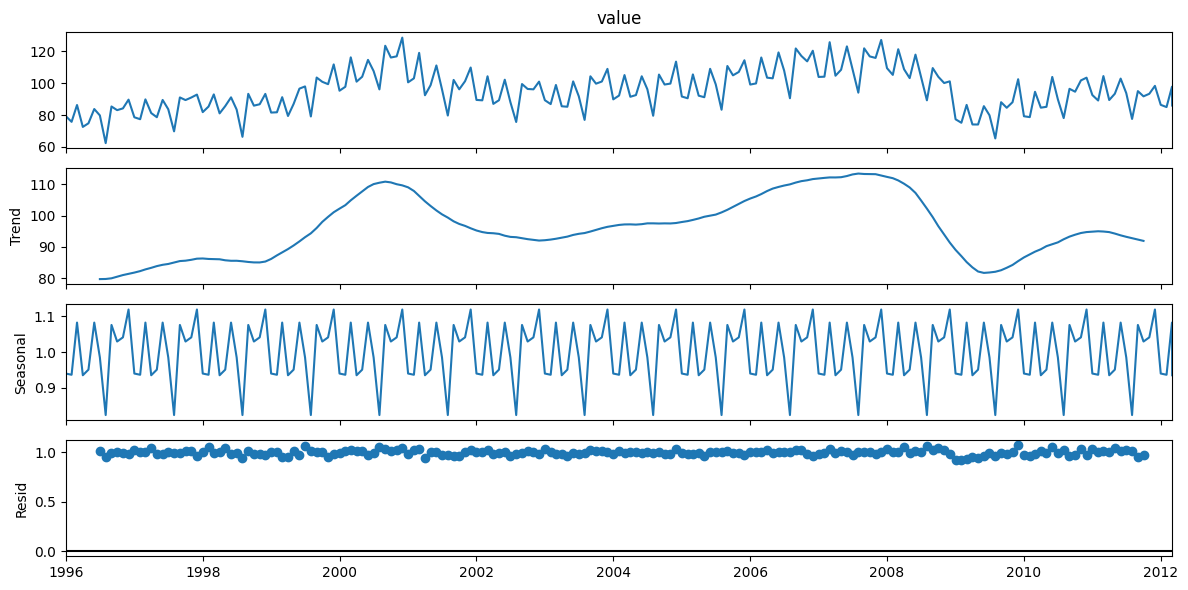

In [80]:
# multiplicative = model เป็นแบบ "คูณ"
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [81]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed) # ค่าสังเกต

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้ \
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01 \
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set \
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [82]:
# 1.1
ts_training = data.loc['1996-01-01':'2009-12-01', 'value']
ts_test = data.loc['2010-01-01':'2012-03-01', 'value']
print(ts_training)
print(ts_test)

time
1996-01-01     79.35
1996-02-01     75.78
1996-03-01     86.32
1996-04-01     72.60
1996-05-01     74.86
               ...  
2009-08-01     65.36
2009-09-01     88.09
2009-10-01     84.60
2009-11-01     88.09
2009-12-01    102.52
Name: value, Length: 168, dtype: float64
time
2010-01-01     79.28
2010-02-01     78.74
2010-03-01     94.62
2010-04-01     84.66
2010-05-01     85.20
2010-06-01    103.94
2010-07-01     89.87
2010-08-01     78.14
2010-09-01     96.50
2010-10-01     94.68
2010-11-01    101.77
2010-12-01    103.48
2011-01-01     92.57
2011-02-01     89.16
2011-03-01    104.48
2011-04-01     89.45
2011-05-01     93.40
2011-06-01    102.90
2011-07-01     93.77
2011-08-01     77.58
2011-09-01     95.04
2011-10-01     91.77
2011-11-01     93.37
2011-12-01     98.34
2012-01-01     86.44
2012-02-01     85.04
2012-03-01     97.80
Name: value, dtype: float64


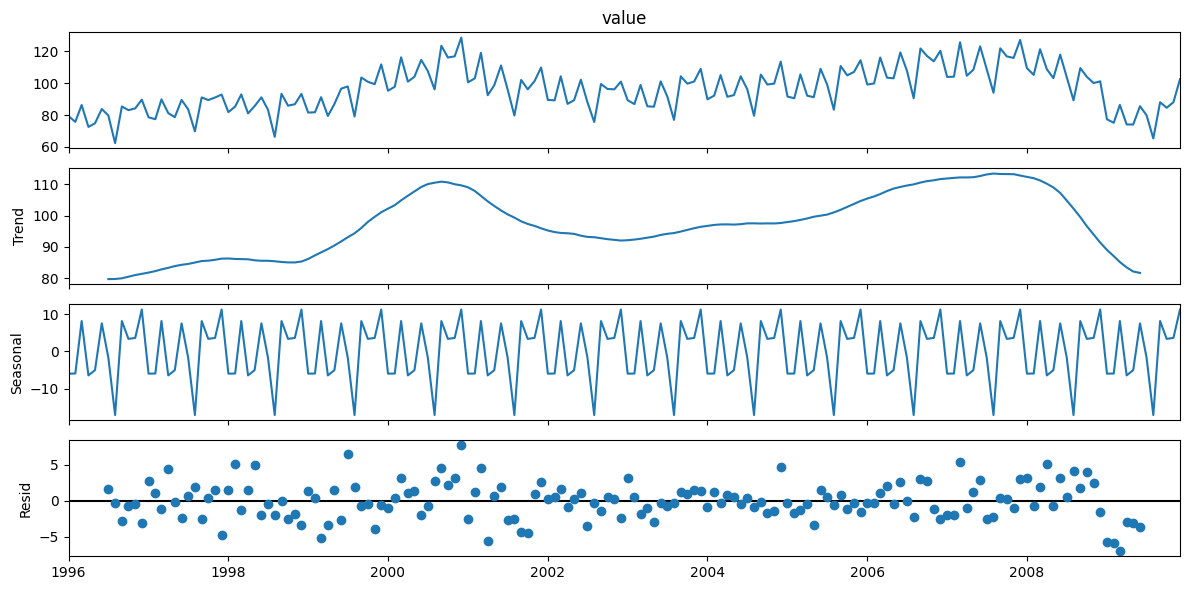

In [83]:
# 1.2
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
# additive = model เป็นแบบ "บวก"
mpl.rc("figure", figsize=(12,6))
result = seasonal_decompose(ts_training, model='additive', period=12)
result.plot();

In [84]:
# 1.3
trend = result.trend.dropna().iloc[-1]
print(trend)
seanonal = list(result.seasonal.dropna().iloc[:12]) # เพราะเป็น seasonal เป็นแบบรายเดือน ดังนั้น จะเท่ากับ 12
print(seanonal)
residual = result.resid.dropna().iloc[-1]
print(residual)

81.725
[-5.98585737179487, -5.957940705128207, 8.183245192307693, -6.462427884615383, -5.041177884615387, 7.5529887820512815, -1.6409535256410257, -17.138902243589744, 8.178886217948719, 3.378341346153848, 3.6443349358974384, 11.28946314102564]
-3.6679887820512764


In [85]:
print(len(ts_test))

27


In [86]:
predict = []
for i in range(len(ts_test)):
    predict.append(trend + seanonal[i % 12] + residual) # % 12 --> 0,1,...,11
print(predict)

[np.float64(72.07115384615385), np.float64(72.0990705128205), np.float64(86.2402564102564), np.float64(71.59458333333333), np.float64(73.01583333333332), np.float64(85.61), np.float64(76.41605769230769), np.float64(60.91810897435898), np.float64(86.23589743589743), np.float64(81.43535256410256), np.float64(81.70134615384615), np.float64(89.34647435897435), np.float64(72.07115384615385), np.float64(72.0990705128205), np.float64(86.2402564102564), np.float64(71.59458333333333), np.float64(73.01583333333332), np.float64(85.61), np.float64(76.41605769230769), np.float64(60.91810897435898), np.float64(86.23589743589743), np.float64(81.43535256410256), np.float64(81.70134615384615), np.float64(89.34647435897435), np.float64(72.07115384615385), np.float64(72.0990705128205), np.float64(86.2402564102564)]


In [87]:
ts_new = pd.DataFrame({"actual value": ts_test, "predicted values": predict}, index=ts_test.index)
ts_new = ts_new.dropna()
print(ts_new)

            actual value  predicted values
time                                      
2010-01-01         79.28         72.071154
2010-02-01         78.74         72.099071
2010-03-01         94.62         86.240256
2010-04-01         84.66         71.594583
2010-05-01         85.20         73.015833
2010-06-01        103.94         85.610000
2010-07-01         89.87         76.416058
2010-08-01         78.14         60.918109
2010-09-01         96.50         86.235897
2010-10-01         94.68         81.435353
2010-11-01        101.77         81.701346
2010-12-01        103.48         89.346474
2011-01-01         92.57         72.071154
2011-02-01         89.16         72.099071
2011-03-01        104.48         86.240256
2011-04-01         89.45         71.594583
2011-05-01         93.40         73.015833
2011-06-01        102.90         85.610000
2011-07-01         93.77         76.416058
2011-08-01         77.58         60.918109
2011-09-01         95.04         86.235897
2011-10-01 

In [88]:
y_true = ts_new["predicted values"]
y_pred = ts_new["actual value"]

In [89]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [90]:
# 2
print(rmse(y_true,y_pred))

14.589766942508222


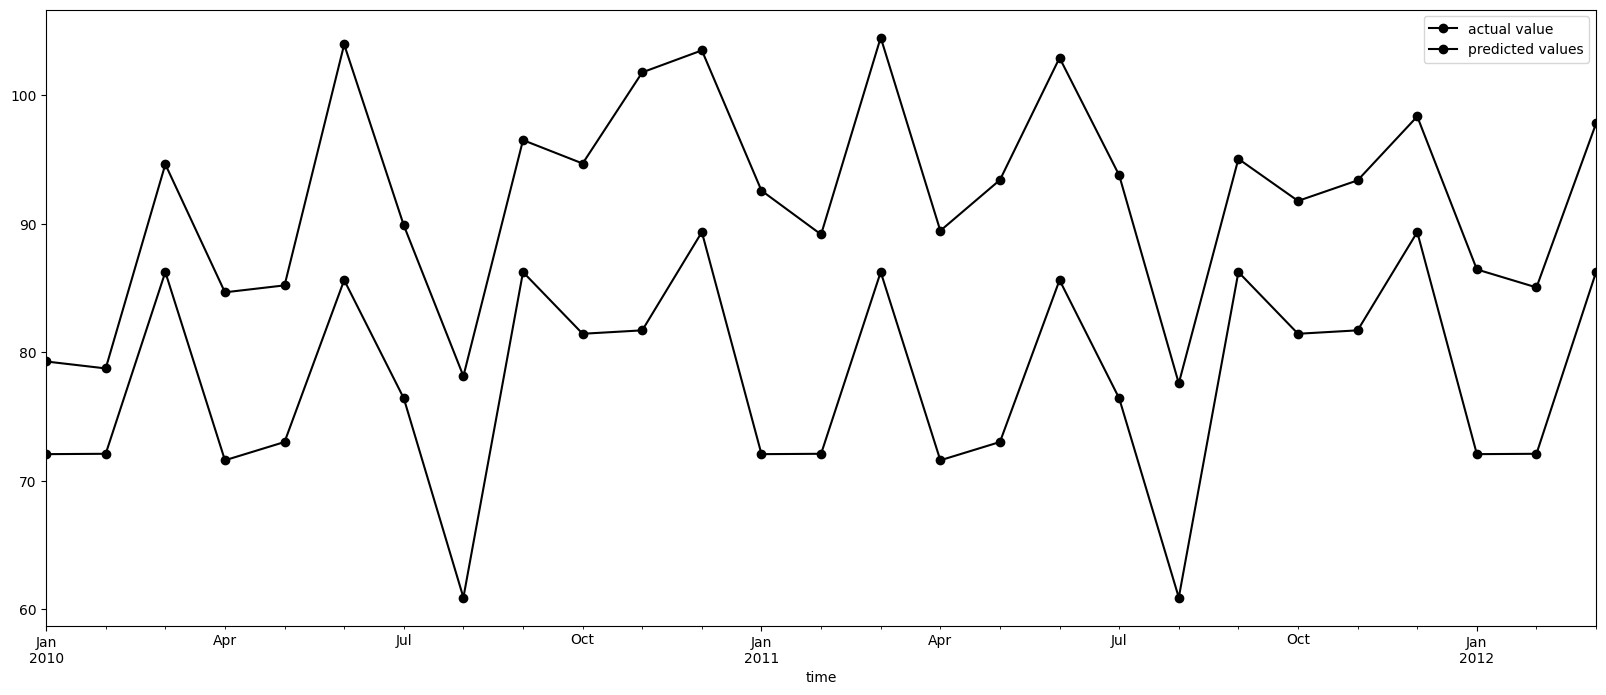

In [91]:
ax = ts_new.plot(marker='o', color='black', figsize=(20,8))

Text(0, 0.5, 'elecequip')

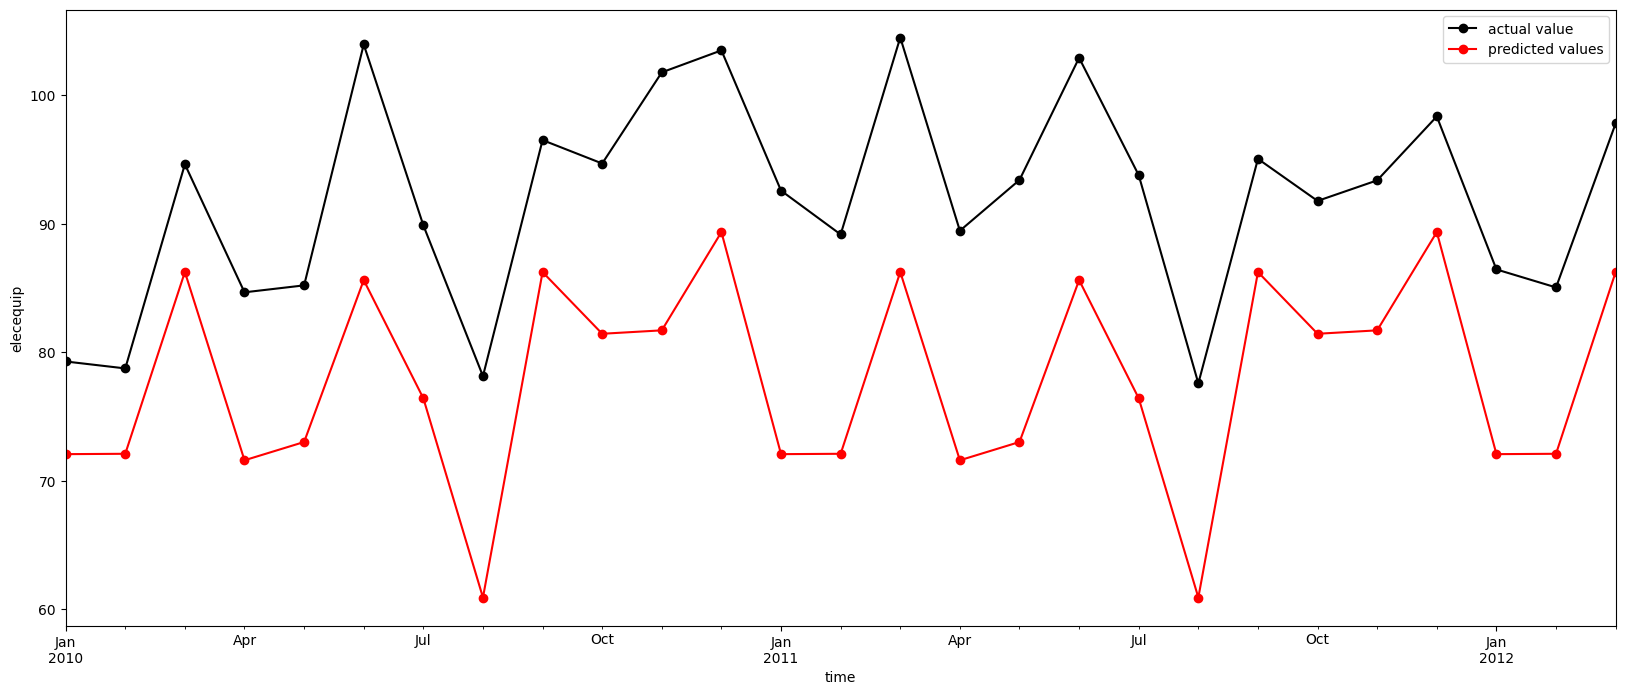

In [92]:
# 3
#ax = ts_new.plot(marker='o', color='black', figsize=(20,8))
ax = ts_new["actual value"].plot(marker='o', color='black', figsize=(20,8))
ax = ts_new["predicted values"].plot(marker='o', color='red', figsize=(20,8))
ax.legend(["actual value", "predicted values"])
ax.set_xlabel("time")
ax.set_ylabel("elecequip")